In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Dataset

In [2]:
dataset='bone_tumor'

from loader import DataLoader
dl = DataLoader()
primitive_matrix, ground = dl.load_data(dataset=dataset)

In [3]:
#TODO formalize
train_primitive_matrix = primitive_matrix[0:400,:]
train_ground = ground[0:400]

val_primitive_matrix = primitive_matrix[400:600,:]
val_ground = ground[400:600]

## Synthesize Heuristics

In [12]:
from synthesizer import Synthesizer
syn = Synthesizer(val_primitive_matrix, val_ground)

In [40]:
hf, feat_combos = syn.generate_heuristics(cardinality=2)

#optional pruning
sort_idx = syn.prune_heuristics(hf,feat_combos, keep=30)
hf = [hf[i] for i in sort_idx]
feat_combos = [feat_combos[i] for i in sort_idx]

In [41]:
X_train = train_primitive_matrix[:,feat_combos]
L_train = syn.apply_heuristics(hf,X_train)

X_val = val_primitive_matrix[:,feat_combos]
L_val = syn.apply_heuristics(hf,X_val)

## Verify Heuristics

In [42]:
from verifier import Verifier
vf = Verifier(L_train, L_val, val_ground)

In [43]:
vf.train_gen_model()
vf.gen_model.learned_lf_stats()

Inferred cardinality: 2


,Accuracy,Coverage,Precision,Recall
0,0.910270,0.7712,0.915022,0.6956
1,0.899871,0.7740,0.898718,0.7010
2,0.913694,0.7821,0.914424,0.7202
3,0.912349,0.7758,0.911986,0.7046
4,0.913893,0.7781,0.912877,0.7146
5,0.886707,0.7538,0.888560,0.6602
6,0.911795,0.7800,0.910164,0.7092
7,0.906214,0.7741,0.906797,0.7044
8,0.902298,0.7615,0.905963,0.6898
9,0.916645,0.7786,0.912424,0.7168


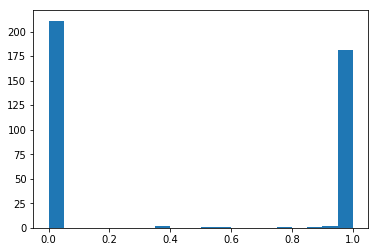

In [44]:
vf.assign_marginals()
plt.hist(vf.train_marginals, bins=20)
plt.show()

In [45]:
vague_idx = vf.find_vague_points(b=0.6, thresh=0.15)
incorrect_idx = vf.find_incorrect_points(b=0.6)
#TODO call the function, print TP/FP/F1/P/R etc in pandas format
1-np.shape(incorrect_idx)[1]/float(np.shape(val_ground)[0])

0.745